In [1]:
# !pip install fbprophet

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics


%matplotlib inline
plt.style.use('fivethirtyeight')

Importing plotly failed. Interactive plots will not work.


In [3]:
df = pd.read_csv('data/AirPassengers.csv')
df.tail(5)

,Month,AirPassengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


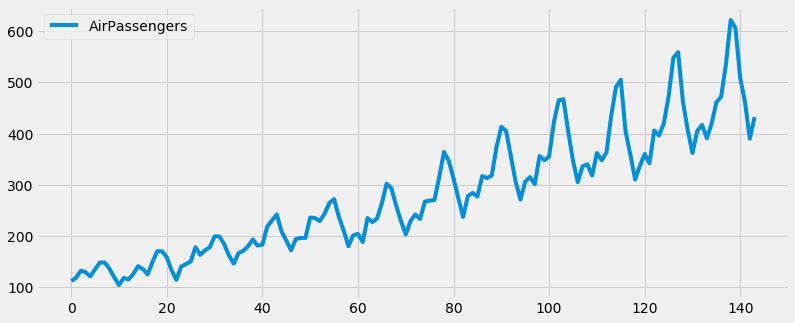

In [4]:
df.plot(figsize=(12, 5))
plt.show()

In [5]:
df.dtypes

Month            object
AirPassengers     int64
dtype: object

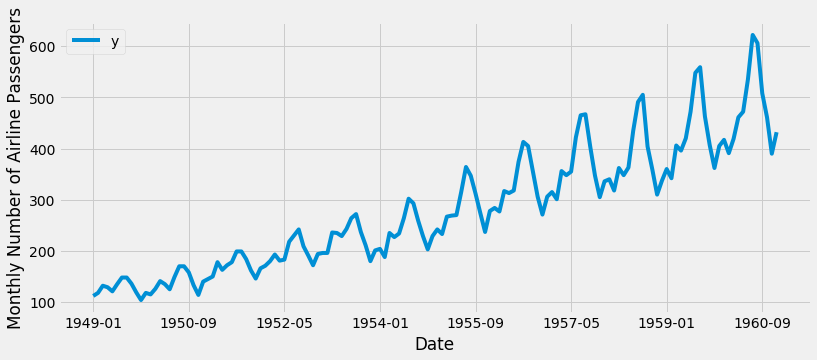

In [6]:
df = df.rename(columns={'Month': 'ds', 'AirPassengers': 'y'})

ax = df.set_index('ds').plot(figsize=(12, 5))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

In [7]:
my_model = Prophet(interval_width=0.95)

In [8]:
my_model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
future_dates = my_model.make_future_dataframe(periods=1, freq='MS')
print(future_dates.shape)
future_dates.tail()

(145, 1)


,ds
140,1960-09-01
141,1960-10-01
142,1960-11-01
143,1960-12-01
144,1961-01-01


In [10]:
forcast = my_model.predict(future_dates)
forcast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
140,1960-09-01,491.455396,447.799733,536.062053
141,1960-10-01,456.787747,413.724765,501.000059
142,1960-11-01,421.954550,376.081209,464.901356
143,1960-12-01,451.089466,408.813758,495.926014
144,1961-01-01,466.062283,424.516974,509.747314


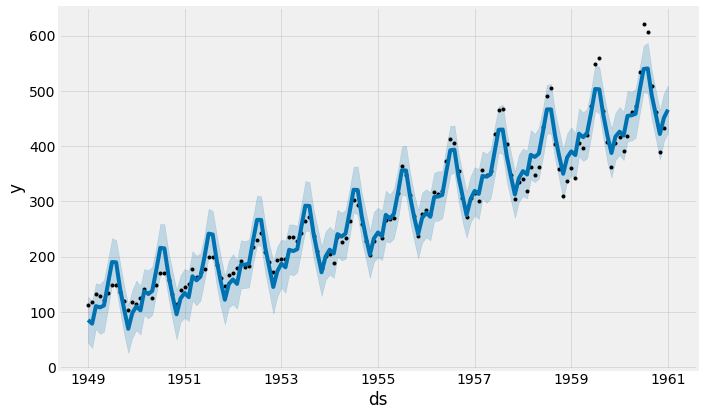

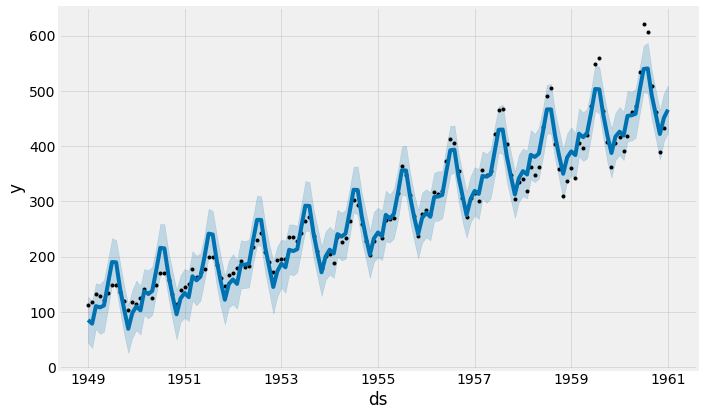

In [11]:
my_model.plot(forcast, uncertainty=True)

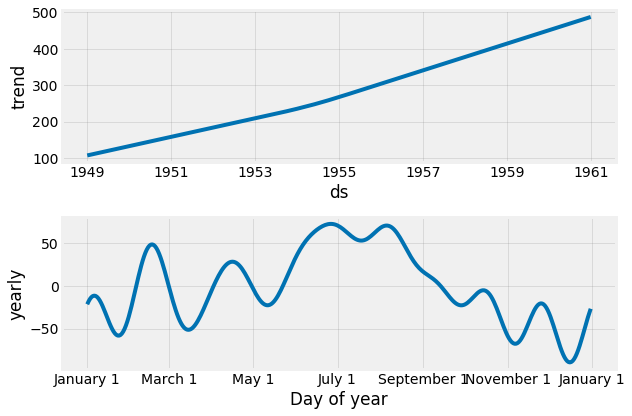

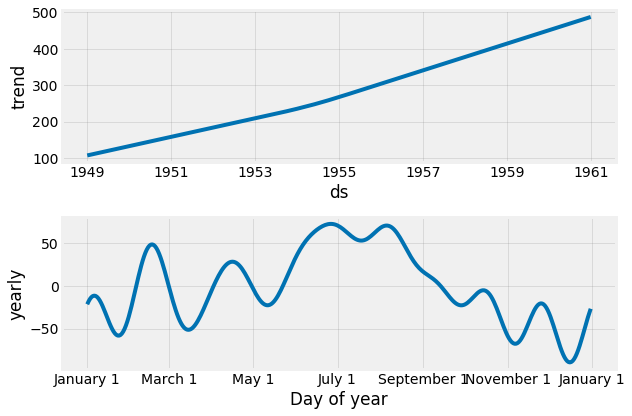

In [12]:
my_model.plot_components(forcast)

In [13]:
df_cv = cross_validation(my_model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,157.684410,157.108318,158.296495,150,1951-01-18
1,1951-03-01,170.555314,169.062350,172.178319,178,1951-01-18
2,1951-04-01,158.287480,155.456184,161.217316,163,1951-01-18
3,1951-05-01,143.447579,139.071274,147.633866,172,1951-01-18
4,1951-06-01,178.290210,172.286833,184.522065,178,1951-01-18


In [14]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1083.942016,32.923275,25.789915,0.078183,0.073537,0.454545
1,42 days,1010.099982,31.782070,25.171390,0.076676,0.073537,0.409091
2,46 days,905.076775,30.084494,24.594864,0.078576,0.079106,0.363636
3,47 days,1040.362824,32.254656,26.749843,0.081610,0.085334,0.363636
4,48 days,1029.936192,32.092619,26.204711,0.079729,0.085334,0.386364


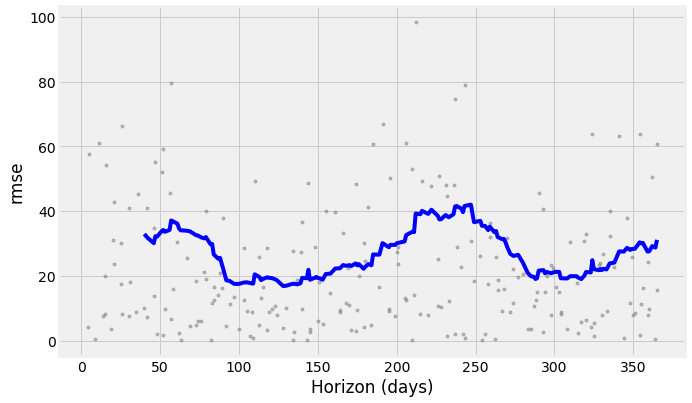

In [15]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


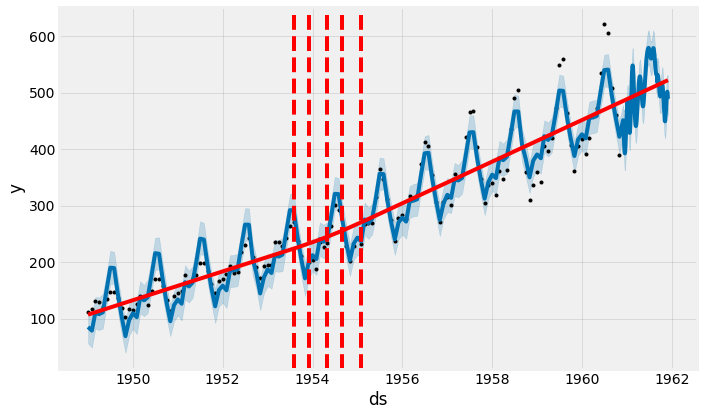

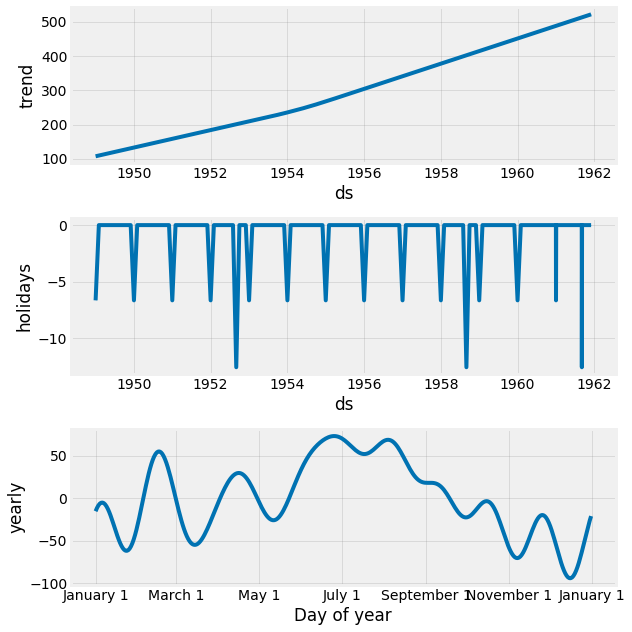

In [20]:
from fbprophet.plot import add_changepoints_to_plot

prophet = Prophet()
prophet.add_country_holidays(country_name='US')
prophet.fit(df[pd.to_datetime(df['ds']) < pd.to_datetime('2017-01-01')])
future = prophet.make_future_dataframe(periods=365, freq='d')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()
